In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df=pd.read_csv('Sample_for_AI...csv')

In [176]:
df.head(10)

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.0,NaN,API
1,2,No,No,No,5.0,674,2.5,NaN,API
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.0,NaN,Landing Page Submission
5,6,No,No,No,0.0,0,0.0,NaN,API
6,7,Yes,No,No,2.0,1640,2.0,Supply Chain Management,Landing Page Submission
7,8,No,No,No,0.0,0,0.0,NaN,API
8,9,No,No,No,2.0,71,2.0,IT Projects Management,Landing Page Submission
9,10,No,No,No,4.0,58,4.0,Finance Management,API


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9240 non-null   int64  
 1   Purchased                    9240 non-null   object 
 2   Do Not Email                 9240 non-null   object 
 3   Do Not Call                  9240 non-null   object 
 4   TotalVisits                  9103 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9103 non-null   float64
 7   Specialization               5860 non-null   object 
 8   Origin                       9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [178]:
df.isnull().sum()

ID                                0
Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Specialization                 3380
Origin                            0
dtype: int64

In [179]:
df.drop('ID',axis=1,inplace=True)

In [180]:
df['TotalVisits'].fillna(df['TotalVisits'].mean(),inplace=True)

In [181]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(),inplace=True)

In [182]:
df['Specialization'].fillna('Unknown',inplace=True)

In [183]:
df.isnull().sum()

Purchased                      0
Do Not Email                   0
Do Not Call                    0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Specialization                 0
Origin                         0
dtype: int64

In [184]:
df.shape

(9240, 8)

In [185]:
df.duplicated().sum()

2219

In [186]:
df.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


In [187]:
num_col=df.select_dtypes(['int64','float64'])
cat_col=df.select_dtypes('object')

In [188]:
num_col.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0,0.0
1,5.0,674,2.5


In [189]:
cat_col.head(2)

,Purchased,Do Not Email,Do Not Call,Specialization,Origin
0,No,No,No,Unknown,API
1,No,No,No,Unknown,API


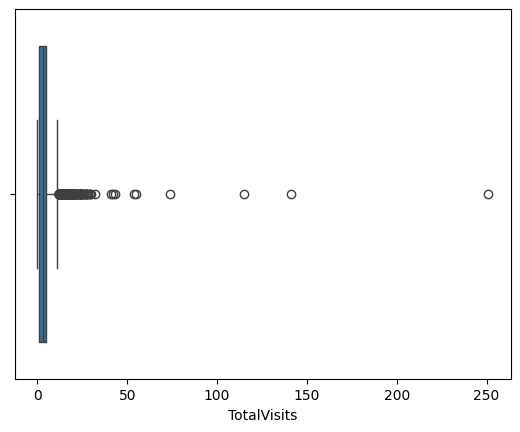

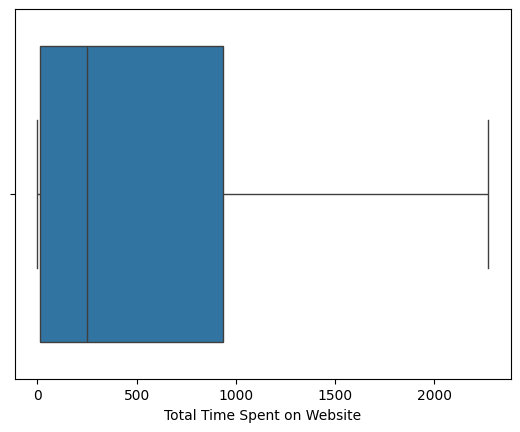

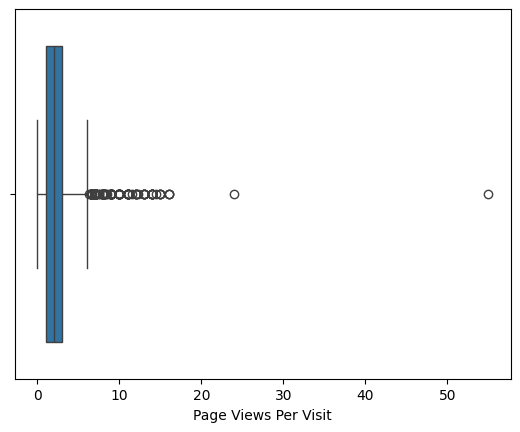

In [190]:
for col in num_col:
  sns.boxplot(x=df[col])
  plt.show()

In [191]:
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

def outliers(value):
    if value < lower_bound:
        return lower_bound
    
    elif value > upper_bound:
        return upper_bound
    
    else:
        return value
    
df['TotalVisits'] = df['TotalVisits'].apply(outliers)

<Axes: xlabel='TotalVisits'>

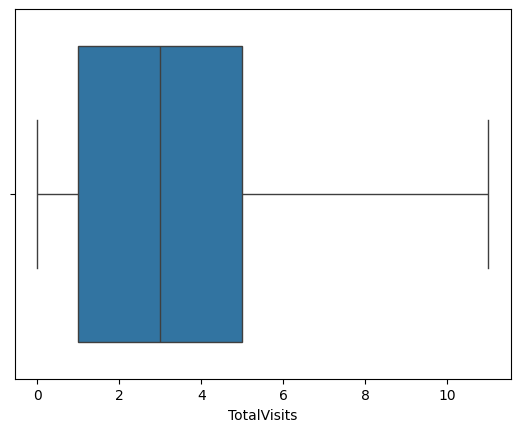

In [192]:
sns.boxplot(x=df['TotalVisits'])

In [193]:
Q1 = df['Page Views Per Visit'].quantile(0.25)
Q3 = df['Page Views Per Visit'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

def outliers(value):
    if value < lower_bound:
        return lower_bound
    
    elif value > upper_bound:
        return upper_bound
    
    else:
        return value
    
df['Page Views Per Visit'] = df['Page Views Per Visit'].apply(outliers)

<Axes: xlabel='Page Views Per Visit'>

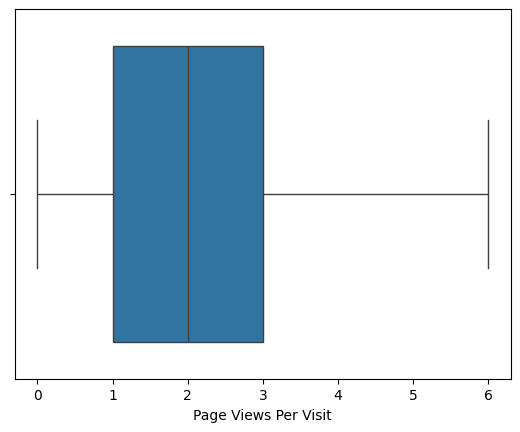

In [194]:
sns.boxplot(x=df['Page Views Per Visit'])

TotalVisits : 0.9628469388334359


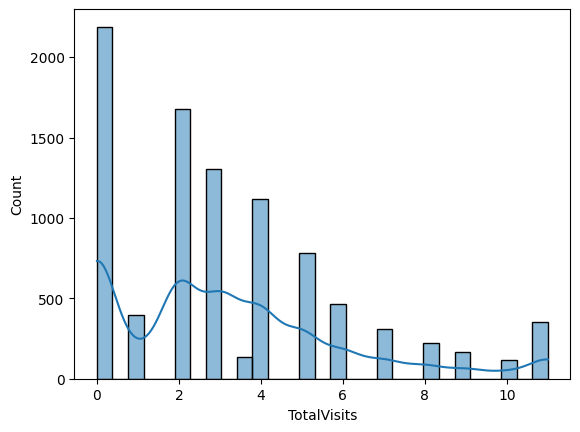

In [195]:
sns.histplot(df['TotalVisits'],kde=True)
print('TotalVisits',':',df['TotalVisits'].skew())

Total Time Spent on Website : 0.9564501929530472


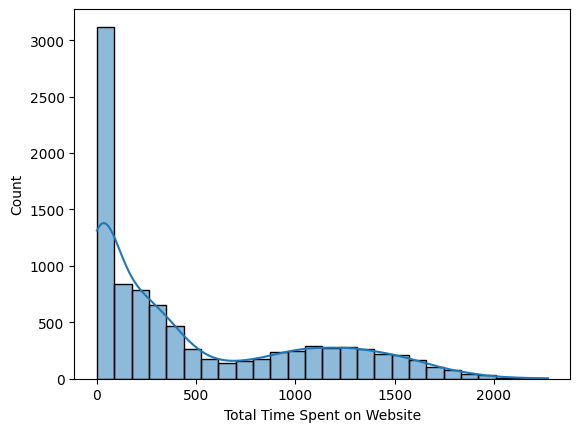

In [196]:
sns.histplot(df['Total Time Spent on Website'],kde=True)
print('Total Time Spent on Website',':',df['Total Time Spent on Website'].skew())

Page Views Per Visit : 0.4324969786337693


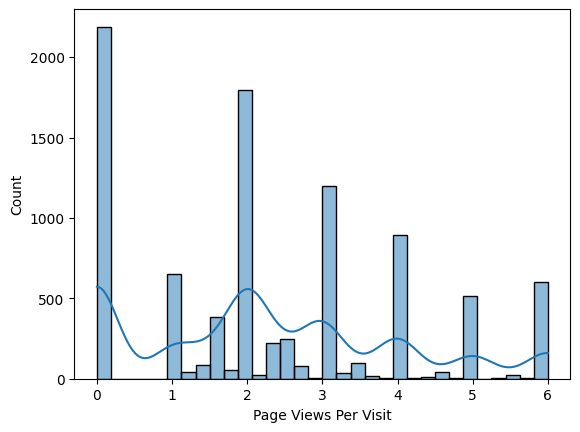

In [197]:
sns.histplot(df['Page Views Per Visit'],kde=True)

print('Page Views Per Visit',':',df['Page Views Per Visit'].skew())

In [198]:
for col in cat_col:
  unique_val=df[col].unique()
  print(f"Unique values in '{col}' column:")
  
  print(unique_val)
  print()

Unique values in 'Purchased' column:
['No' 'Yes']

Unique values in 'Do Not Email' column:
['No' 'Yes']

Unique values in 'Do Not Call' column:
['No' 'Yes']

Unique values in 'Specialization' column:
['Unknown' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']

Unique values in 'Origin' column:
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']



In [199]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [200]:
df['Purchased']=le.fit_transform(df['Purchased'])
df['Do Not Email']=le.fit_transform(df['Do Not Email'])
df['Do Not Call']=le.fit_transform(df['Do Not Call'])
df['Origin']=le.fit_transform(df['Origin'])


In [201]:
# Define the specialization mapping dictionary
specialization_mapping = {
'Unknown': 0,'Business Administration': 1,'Media and Advertising': 2,'Supply Chain Management': 3,'IT Projects Management': 4,
'Finance Management': 5,'Travel and Tourism': 6,'Human Resource Management': 7,'Marketing Management': 8,'Banking, Investment And Insurance': 9,
'International Business': 10,'E-COMMERCE': 11,'Operations Management': 12,'Retail Management': 13,
    'Services Excellence': 14,
    'Hospitality Management': 15,
    'Rural and Agribusiness': 16,
    'Healthcare Management': 17,
    'E-Business': 18
}

# Apply the mapping to the Specialization column
df['Specialization'] = df['Specialization'].map(specialization_mapping)

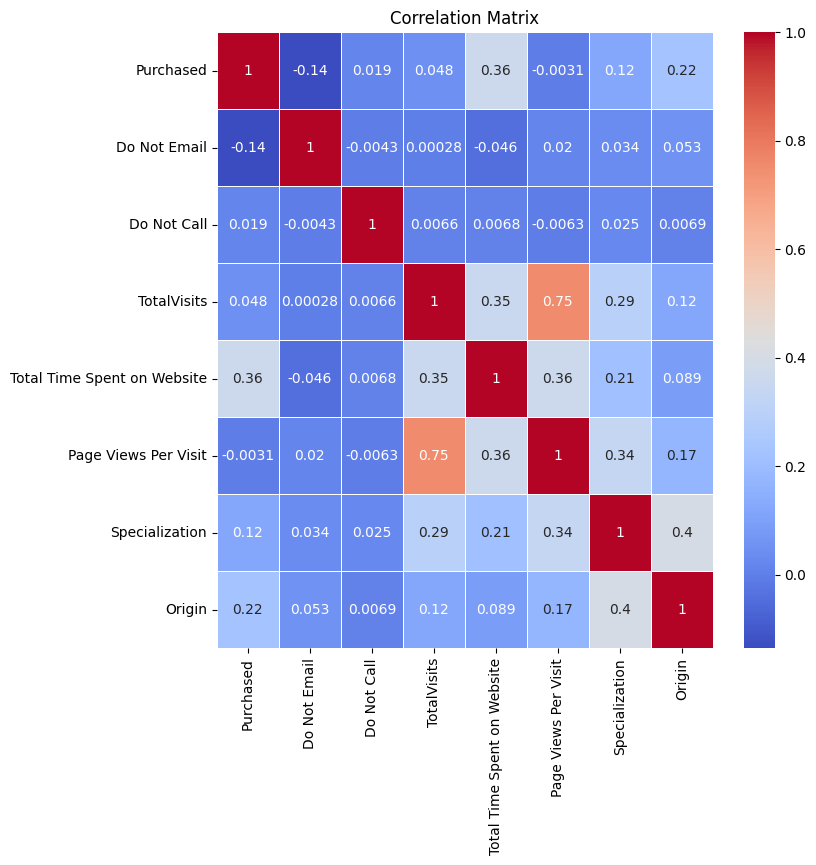

In [202]:
corr_rel=df.corr()

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_rel, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [203]:
df.head(20)

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,0,0,0,0.0,0,0.00,0,0
1,0,0,0,5.0,674,2.50,0,0
2,1,0,0,2.0,1532,2.00,1,1
3,0,0,0,1.0,305,1.00,2,1
4,1,0,0,2.0,1428,1.00,0,1
5,0,0,0,0.0,0,0.00,0,0
6,1,0,0,2.0,1640,2.00,3,1
7,0,0,0,0.0,0,0.00,0,0
8,0,0,0,2.0,71,2.00,4,1
9,0,0,0,4.0,58,4.00,5,0


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [205]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [206]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(x,y,test_size=0.2,random_state=42)

In [207]:
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(7392, 7)
(1848, 7)
(7392,)
(1848,)


In [208]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_TRAIN)
x_test_scaled=scaler.fit_transform(X_TEST)

In [209]:
print(x_train_scaled[:5])

[[ 3.44320377 -0.01645102 -0.43534422 -0.45416471 -0.15255255  0.92351959
   0.48518223]
 [-0.29042719 -0.01645102 -1.13126124 -0.88909718 -1.27567927 -0.98722248
  -1.10951188]
 [-0.29042719 -0.01645102 -0.08738571 -0.16845593  0.40901081 -0.98722248
  -1.10951188]
 [-0.29042719 -0.01645102  0.2605728   0.73780504  0.97057417 -0.13800378
   0.48518223]
 [-0.29042719 -0.01645102 -0.43534422 -0.62886562 -0.15255255 -0.77491781
   0.48518223]]


In [210]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [211]:
random_model=RandomForestClassifier()
Decision_model=DecisionTreeClassifier()
ada_model=AdaBoostClassifier()
gradient_model=GradientBoostingClassifier()
xgboots_model=XGBClassifier()
knn_model=XGBClassifier()

In [212]:
Decision_model.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier()

In [213]:
random_model.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier()

In [214]:
ada_model.fit(X_TRAIN,Y_TRAIN)

C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [215]:
gradient_model.fit(X_TRAIN,Y_TRAIN)

GradientBoostingClassifier()

In [216]:
xgboots_model.fit(X_TRAIN,Y_TRAIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [217]:
knn_model.fit(X_TRAIN,Y_TRAIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [218]:
Y_pred_ds=Decision_model.predict(X_TEST)
Y_pred_rf=random_model.predict(X_TEST)
Y_pred_ad=ada_model.predict(X_TEST)
Y_pred_gd=gradient_model.predict(X_TEST)
Y_pred_xg=xgboots_model.predict(X_TEST)
Y_pred_knn=knn_model.predict(X_TEST)

In [219]:
from sklearn.metrics import accuracy_score

In [220]:
print('Desicion model',accuracy_score(Y_TEST,Y_pred_ds))
print('Random model',accuracy_score(Y_TEST,Y_pred_rf))
print('Adaboosts model',accuracy_score(Y_TEST,Y_pred_ad))
print('Gradient model',accuracy_score(Y_TEST,Y_pred_gd))
print('XGboosts model',accuracy_score(Y_TEST,Y_pred_xg))
print('KNN model',accuracy_score(Y_TEST,Y_pred_knn))

Desicion model 0.7088744588744589
Random model 0.7554112554112554
Adaboosts model 0.7992424242424242
Gradient model 0.7927489177489178
XGboosts model 0.7727272727272727
KNN model 0.7727272727272727


In [221]:
print("\nDecision Tree Classification Report:\n", classification_report(Y_TEST, Y_pred_ds))
print("\nRandom Forest Classification Report:\n", classification_report(Y_TEST, Y_pred_rf))
print("\nAdaBoost Classification Report:\n", classification_report(Y_TEST, Y_pred_ad))
print("\nGradient Boosting Classification Report:\n", classification_report(Y_TEST, Y_pred_gd))
print("\nXGBoost Classification Report:\n", classification_report(Y_TEST, Y_pred_xg))
print("\nK-Nearest Neighbors Classification Report:\n", classification_report(Y_TEST, Y_pred_knn))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      1107
           1       0.65      0.59      0.62       741

    accuracy                           0.71      1848
   macro avg       0.70      0.69      0.69      1848
weighted avg       0.71      0.71      0.71      1848


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1107
           1       0.72      0.64      0.68       741

    accuracy                           0.76      1848
   macro avg       0.75      0.74      0.74      1848
weighted avg       0.75      0.76      0.75      1848


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1107
           1       0.77      0.72      0.74       741

    accuracy                           0.80      1848
   macro avg    

In [222]:
ada_model.fit(x_train_scaled,Y_TRAIN)
y_pred=ada_model.predict(x_test_scaled)

C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [223]:
print('Accuracy_score',accuracy_score(Y_TEST,y_pred))
print('classification_report',classification_report(Y_TEST,y_pred))

Accuracy_score 0.7997835497835498
classification_report               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1107
           1       0.77      0.72      0.74       741

    accuracy                           0.80      1848
   macro avg       0.79      0.79      0.79      1848
weighted avg       0.80      0.80      0.80      1848



In [226]:
feature_names = df.columns.tolist()
print("Feature Names Used in Training:", feature_names)

Feature Names Used in Training: ['Purchased', 'Do Not Email', 'Do Not Call', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization', 'Origin']


In [235]:
X_NEW = pd.DataFrame({
    'TotalVisits': [2.0],
    'Total Time Spent on Website': [1428],
    'Page Views Per Visit': [1.00],
    'Do Not Email_No': [0],   # Adjust as per your training data
    'Do Not Call_No': [0],     # Adjust as per your training data
    'Specialization_Business Administration': [0],  # Change based on your encoded values
    'Origin_API': [1],        # Adjust based on your training data
    # Add other one-hot encoded features as needed
})

# Check the order of columns

In [236]:
Y_pred = ada_model.predict(X_NEW)


# Output the prediction
print("Predicted Purchase Status:", Y_pred)

Predicted Purchase Status: [0]


C:\Users\shubh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
